# Laboratorio 2 - Parte 1

### Modelos no paramétricos

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [3]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html


Haga click en el siguiente enlace para autenticarse con su cuenta de correo institucional
https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=893762525034-g9d91ddls9e19a1q77c7hsq2rhgqo9h7.apps.googleusercontent.com&access_type=offline&scope=profile+email&redirect_uri=http%3A%2F%2Flocalhost%3A8080
waiting for authentication ...
authentication succeeded
/?code=4/SADnqfhblek7DIqc4zECVX_FooHTNxZKfAt8Yf1FZzjVAT2pIFDo8hepsbLQtgmzPKAsdnO9gwRBAviUY_d3rBM


,juan.arias8@udea.edu.coJUAN DAVID ARIAS GUARÍNgoogle id: 115821968669581983796


#### Segundo integrante:

<b>Comentario</b>: Nota: 4.8

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

# Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados.

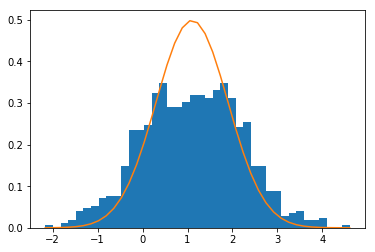

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mu_1 = 0.5
mu_2 = 0.6 
sigma = 0.8
gaussiana_1 = np.random.normal(mu_1, sigma, 1000)
gaussiana_2 = np.random.normal(mu_2, sigma, 1000)
gaussianas = gaussiana_1 + gaussiana_2

count, bins, _ = plt.hist(gaussianas, 40, density = True)
plt.plot(bins, 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(bins - (mu_1 + mu_2))**2 / (2 * sigma**2)))
plt.show()

## Ejercicio 2

Para el problema de regresion usaremos la misma base de datos del laboratorio anterior.

In [4]:
# cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

# Esta es la base de datos AirQuality del UCI Machine Learning Repository. En la siguiente URL se encuentra toda
# la descripción de la base de datos y la contextualización del problema.
# https://archive.ics.uci.edu/ml/datasets/Air+Quality#

X = db[:5000, 0:12]
Y = db[:5000, 12]

In [5]:
print(X.shape)
print(Y.shape)

(5000, 12)
(5000,)


Describa cómo esta construida la base de datos utilizada en el problema de regresion: 

2.1 ¿Cuántas muestras hay en total?:
    * La base de datos tiene 5000 muestras en total

2.2 ¿Cuántas características tiene el problema?:
    * La base de datos tiene 12 caractérísticas en total

## Ejercicio 3

Analice los siguientes métodos a la luz de la teoría vista para los modelos de K vecinos más cercanos (KNN) y complete el código del método KNN.

<b>Nota</b>: Para el cáculo de la distancia entre vectores tienen dos opciones, usar la función scipy.spatial.distance.euclidean o usar la función numpy.linalg.norm. Revisen la documentación para comprender su uso. También serán de utilidad las funciones numpy.sort y numpy.argsort.


In [7]:
import operator

from numpy import linalg as la
from scipy.spatial import distance

In [8]:
# Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est, Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N, 1) - Y.reshape(N, 1)) / Y.reshape(N, 1))) / N
    return mape 

In [9]:
# Para calcular el error en los problemas de clasificación
def error(Y_lest, Y):
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error / np.size(Y)
    
    return error

In [10]:
def points_distance(p1, p2):
    return la.norm(p1 - p2)

In [11]:
def points_distance_2(p1, p2):
    return distance.euclidean(p1, p2)

In [12]:
p1 = np.array([10, 25, 15])
p2 = np.array([7, 2, 34])

print(points_distance(p1, p2))
print(points_distance_2(p1, p2))

29.9833287011299
29.9833287011299


In [13]:
p1 = np.array([10, 25, 15])

sort_1 = sorted(p1)
sort_2 = np.sort(p1)

print(sort_1)
print(sort_2)

print(type(sort_1))
print(type(sort_2))

[10, 15, 25]
[10 15 25]
<class 'list'>
<class 'numpy.ndarray'>


In [14]:
array = np.array([10, 20, 3, 8, 9, 5])
index = np.argsort(array)
index

array([2, 5, 3, 4, 0, 1])

In [15]:
def KNN(X_train, Y_train, X_val, k, tipo):
    
    # X_train es la matriz con las muestras de entrenamiento
    # Y_train es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    # X_val es la matriz con las muestras de validación
    # tipo es una bandera que indica si el problema es de regresión o de clasificación.
    # Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de
    # predicción de la variable de salida
    
    Y_est = []    
    
    for x_1 in X_val:
        
        neighborhood = []
        distances = []
       
        for x_2 in X_train:
            distances.append(points_distance(x_1, x_2))
               
        sorted_index = np.argsort(distances)
       
        # k vecinos cercanos
        for i in range(k):
            neighborhood.append(Y_train[sorted_index[i]])
       
        # Regression option
        if tipo == 'r':
            k_mean = np.mean(neighborhood)
            Y_est.append(k_mean)
        
        # Classification option
        elif tipo == 'c':
            k_mode = np.mode(neighborhood)
            Y_est.append(k_mode)

    return Y_est   
       

## Ejercicio 4

Una vez haya completado el codigo del método de KNN, ejecute varias veces el proceso de entrenamiento y evaluacion cambiando el parametro $k$, el cual es el numero de vecinos, y complete la siguiente tabla con los valores del error MAPE obtenidos:

In [17]:
from numpy import random
from scipy import stats
import math

from sklearn import neighbors

N = np.size(X, 0)

# Validamos el modelo
random.seed(1)
Error = np.zeros(2)
for j in range(2):
    ind = np.random.permutation(N)
    Xtrain = X[ind[0:int(math.ceil(0.7 * N))], :]
    Xtest = X[ind[int(math.ceil(0.7 * N)):N], :]
    Ytrain = Y[ind[0:int(math.ceil(0.7 * N))]]
    Ytest = Y[ind[int(math.ceil(0.7 * N)):N]]

    # Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1)) / np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
    # Complete con el llamado apropiado de la función que Uds diseñaron
    Yest = KNN(Xtrain, Ytrain, Xtest, 100, 'r')

    Yest = np.array(Yest)
    Ytest = np.array(Ytest)
    
    # neigh = neighbors.KNeighborsRegressor(n_neighbors=2)
    # neigh.fit(Xtrain, Ytrain) 
    # Yest = neigh.predict(Xtest)
        
    # Evaluamos las predicciones del modelo con los datos de test
    Error[j] = MAPE(Yest, Ytest)  
print('\nError durante la prueba = ' + str(np.mean(Error)) + '+-' + str(np.std(Error)))


Error durante la prueba = 0.26879661924012493+-0.005340544195603092


In [18]:
print(Xtrain.shape)
print(Xtest.shape)

(3500, 12)
(1500, 12)


In [19]:
print(Ytrain.shape)
print(Ytest.shape)

(3500,)
(1500,)


Responda:

4.1 ¿Qué metodología de validación se usa en el experimento?
    * Para la validación se toman muestras aleatorias de el conjunto de datos, en las cuales el 70% de las 
      muestras van para datos de entrenamiento y 30% para datos de validación, además de esto el proceso se 
      repite en dos iteraciones, por tanto se está utilizando Bootstrap validation

4.2 ¿Cuántas muestras se usan para el entrenamiento?
    * Se utilizan 3500 muestras para el entrenamiento
    
4.3 ¿Cuántas muestras se usan para la validación?
    * Se utilizan 1500 muestras para la validación

#### Tabla de resultados

In [22]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame(
    {'Numero de vecinos' : pd.Series(
        ['1', '2', '3', '4', '5', '6', '7', '100']
    )}
)

df_types["Error_Prueba"] = ""
df_types["Desviación estándar del error"] = ""
df_types.set_index(['Numero de vecinos'], inplace=True)
df_types["Error_Prueba"][1] = "0.3630"
df_types["Desviación estándar del error"][1] = "0.0061"

#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'minVisibleRows': 8, 'highlightSelectedRow': True, 'explicitInitialization': True, '…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [23]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Numero de vecinos,,
1,0.3840,0.0164
2,0.3630,0.0061
3,0.3497,0.0023
4,0.3411,0.0045
5,0.3336,0.0027
6,0.3252,0.0019
7,0.3201,0.0007
100,0.2687,0.0053


## Ejercicio 5

Ahora debe resolver el mismo problema de regresión, pero con el modelo de ventana de Parzen.

Para el problema de regresión debe completar el código para implementar la función Nadaraya-Watson.

Nota: Los métodos dist_euclidiana y ECM continuan siendo válidos para el modelo ventana de Parzen.


In [24]:
# Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est, Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N, 1) - Y.reshape(N, 1)) / Y.reshape(N, 1))) / N
    return mape 

In [25]:
def points_distance(p1, p2):
    return la.norm(p1 - p2)

In [26]:
def kernel_gaussiano(x):
    return (np.exp((-0.5) * x**2))

In [29]:
def Nadaraya_Watson(X_train, X_val, Y_train, h):
    """
    Parameters
    ----------
    X_train: matrix
        muestras de entrenamiento 
    Y_train: array 
        muestras de entrenamiento target
    X_val: matrix 
        muestras de validación
    h: int
        ancho de la ventana
    """
    
    Y_est = []
    
    for xv in X_val:
        num = 0
        den = 0
        
        for index, xt in enumerate(X_train):
            ui = points_distance(xv, xt) / h
            num += kernel_gaussiano(ui) * Y_train[index]
            den += kernel_gaussiano(ui)
        Y_est.append(num / den)
    
    # Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden. 
    return Y_est


## Ejercicio 6

Una vez haya completado el codigo del método de Ventana de Parzen, ejecute varias veces el proceso de entrenamiento y evaluacion cambiando el parametro $h$, el cual es el ancho de la función kernel, y complete la siguiente tabla con los valores del error MAPE obtenidos:

In [30]:
from numpy import random
from scipy import stats
import math

from sklearn import neighbors

N = np.size(X, 0)

# Validamos el modelo
random.seed(1)
Error = np.zeros(2)
for j in range(2):
    ind = np.random.permutation(N)
    Xtrain = X[ind[0:int(math.ceil(0.7 * N))], :]
    Xtest = X[ind[int(math.ceil(0.7 * N)):N], :]
    Ytrain = Y[ind[0:int(math.ceil(0.7 * N))]]
    Ytest = Y[ind[int(math.ceil(0.7 * N)):N]]

    # Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1)) / np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
    # Complete con el llamado apropiado de la función que Uds diseñaron
    Yest = Nadaraya_Watson(Xtrain, Xtest, Ytrain, 10)

    Yest = np.array(Yest)
    Ytest = np.array(Ytest)
        
    # Evaluamos las predicciones del modelo con los datos de test
    Error[j] = MAPE(Yest, Ytest)  
print('\nError durante la prueba = ' + str(np.mean(Error)) + '+-' + str(np.std(Error)))


Error durante la prueba = 2.1427564244929034+-0.15597858444551282


#### Tabla de resultados

In [31]:
randn = np.random.randn
df_types2 = pd.DataFrame(
    {'Ancho del kernel' : pd.Series(
        ['0.1', '0.9', '1', '2', '3', '5', '10']
    )}
)
df_types2["Error_Prueba"] = ""
df_types2["Desviación estándar del error"] = ""
df_types2.set_index(['Ancho del kernel'], inplace=True)
df_types2["Error_Prueba"][1] = "0.3011"
df_types2["Desviación estándar del error"][1] = "0.0031"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'minVisibleRows': 8, 'highlightSelectedRow': True, 'explicitInitialization': True, '…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [32]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Ancho del kernel,,
0.1,0.3813,0.0157
0.9,0.3011,0.0031
1,0.3052,0.0031
2,0.3054,0.0039
3,0.2993,0.0042
5,0.2644,0.0033
10,2.1427,0.1559


Responda:

6.1 Si intenta repetir la prueba anterior para un $h = 0.05$ el algoritmo falla. ¿Cuál es la causa de la falla?:
    * RuntimeWarning: invalid value encountered in double_scalars
    Al asignar el valor de 0.05 al valor de h se obtiene que el valor de u es cero.
    Al realizar los calculos siguientes, los cuales corresponden al numerador y denominador
    se encuentra que ambos valores son cero también, por tanto, al momento de realizar 
    la división de ambos valores el algoritmo arroja un valor nan, lo cual produce así un vector 
    de Yest completamente lleno de nan

6.2 ¿Cómo evito que se presente la excepción?:
    * Empleando valores aproximados a 0.9 o mayores o iguales a este.

<b>Comentarion</b>: 6.1 La respuesta es correcta pero sólo explica el problema numérico no la fuente del problema, ¿Qué pasa en los datos, que se produce dicho error? 6.2 No se debe limitar el valor de h porque dependiendo del problema puede ser necesario usar un valor más pequeño. De hecho el valor 0.1 es uno de los más usados. Se puede evitar sumando un epsilón (valor muy pequeño) al denominador de la función.

In [33]:
"""
Al asignar el valor de 0.05 al valor de h se obtiene que el valor de u es cero.
Al realizar los calculos siguientes, los cuales corresponden al numerador y denominador
se encuentra que ambos valores son cero también, por tanto, al momento de realizar 
la división de ambos valores el algoritmo arroja un valor nan, lo cual produce así un vector 
de Yest completamente lleno de nan
"""

distance = 3.422137568956482
u = distance / 0.088888

gaussian_kernel = (np.exp((-0.5) * u**2))

print(u)
print(gaussian_kernel)

38.49943264508688
1.4e-322
